# ANNchor Selective Subset
In this notebook we use ANNchor's selective subset algorithm to find a Nearest Neighbor Coreset.

## Import modules and load make_moons data set

In [1]:
import numpy as np
import time
from matplotlib import pyplot as plt
from annchor import Annchor

In [2]:
from sklearn.datasets import make_moons

In [3]:
np.random.seed(1)
X,y=make_moons(n_samples=2000,noise=0.1)

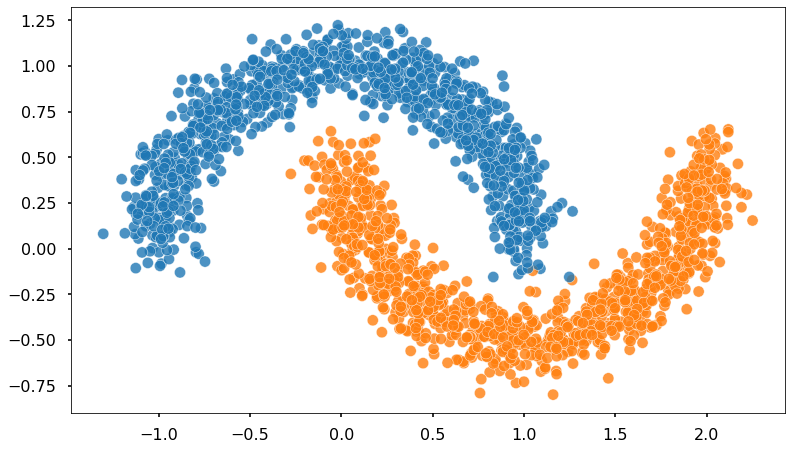

In [4]:
with plt.style.context('seaborn-poster'):
    fig,ax = plt.subplots()
    ax.scatter(*X.T,c=y,cmap=plt.cm.tab10,vmin=0,vmax=10,edgecolors='w',alpha=0.8)
    ax.set_aspect(1)

## Run Annchor
We find the k-NN graph with annchor by calling the ```.fit``` method. (Remember, run time is effected by the numba.jit compilation time on the first run).

In [8]:
start_time = time.time()
knn = 15
ann = Annchor(X,
              'euclidean',
              n_anchors=30,
              n_neighbors=knn,
              n_samples=5000,
              p_work=0.2)

ann.fit()
print('ANNchor Time: %5.3f seconds' % (time.time()-start_time))

ANNchor Time: 2.696 seconds


## Get Selective Subset
We call ```.annchor_selective_subset(y=y,alpha=alpha)``` to find a selective subset. The arguments are ```y```, the data labels, and ```alpha```, the error tolerance.

In [9]:
start_time = time.time()
ss = ann.annchor_selective_subset(y=y,alpha=0)
print('ANNchor Selective Subset Time: %5.3f seconds' % (time.time()-start_time))
print('ANNchor Selective Subset Size: %d (%3.1f%% smaller)' % (len(ss),
                                                             100*(1-len(ss)/len(X))
                                                            )
     )


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

ANNchor Selective Subset Time: 2.429 seconds
ANNchor Selective Subset Size: 25 (98.8% smaller)


## Visualise the selective subset

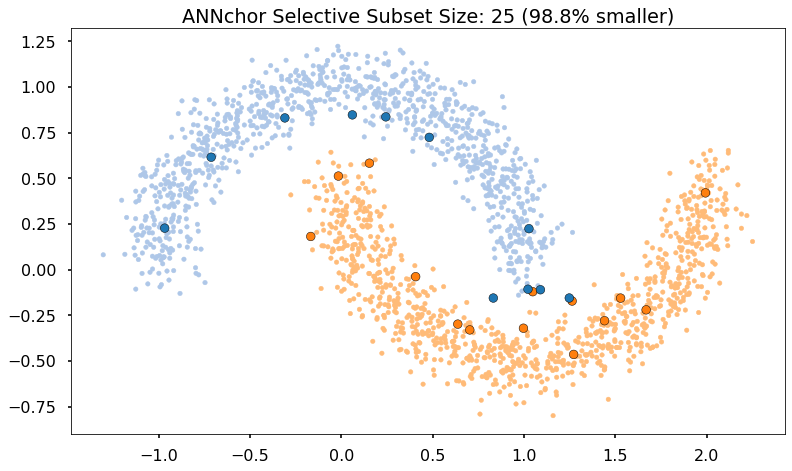

In [10]:
with plt.style.context('seaborn-poster'):
    title = ('ANNchor Selective Subset Size: %d (%3.1f%% smaller)' % (len(ss),
                                                             100*(1-len(ss)/len(X))
                                                            )
             )
    fig,ax = plt.subplots()
    ax.scatter(*(X.T),c=2*y+1,cmap=plt.cm.tab20,vmin=0,vmax=20,alpha=1,s=20)
    ax.scatter(*(X[ss].T),c=y[ss],cmap=plt.cm.tab10,vmin=0,vmax=10,edgecolors='k',s=75)
    ax.set_aspect(1)
    ax.set_title(title)